In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load wineQuality dataset
df = pd.read_csv( "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep= ";")

In [ ]:
#split the data into train and test
x = df.drop(columns=["quality"])
y = df["quality"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [ ]:
#Train the model
linear_svm = SVC(kernel = 'linear')
linear_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
#predicting 
y_pred = linear_svm.predict(x_test)

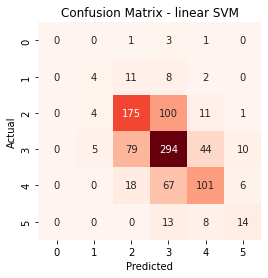

In [ ]:
#printing the claccification report
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= plt.cm.Reds, cbar= False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - linear SVM")
plt.show()

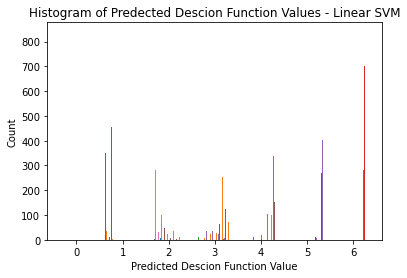

In [ ]:
#plot histogram of predicted class probabilites
proba = linear_svm.decision_function(x_test)
plt.hist(proba, bins = 50)
plt.xlabel("Predicted Descion Function Value")
plt.ylabel("Count")
plt.title("Histogram of Predected Descion Function Values - Linear SVM")
plt.show()

In [ ]:
#Train non-linear svm model
nonlinear_svm = SVC(kernel= 'rbf', gamma= 0.1, C = 10)
nonlinear_svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [ ]:
#print clasification report
y_pred = nonlinear_svm.predict(x_test)
print("Non linear svm classification report", sep = "")
print(classification_report(y_test, y_pred))

Non linear svm classification report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.31      0.16      0.21        25
           5       0.62      0.60      0.61       291
           6       0.61      0.68      0.64       432
           7       0.60      0.53      0.56       192
           8       0.45      0.40      0.42        35

    accuracy                           0.60       980
   macro avg       0.43      0.39      0.41       980
weighted avg       0.59      0.60      0.59       980



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


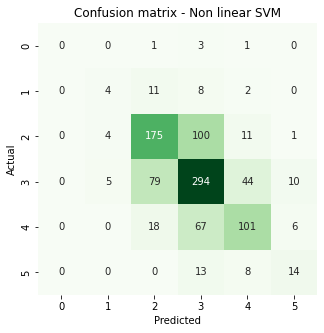

In [ ]:
#plot confusion  matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt= "d", cmap=plt.cm.Greens, cbar= False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix - Non linear SVM")
plt.show()

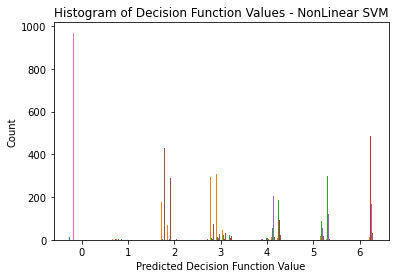

In [ ]:
#plot histogram of predicted probabilities
proba = nonlinear_svm.decision_function(x_test)
plt.hist(proba, bins = 50)
plt.xlabel("Predicted Decision Function Value")
plt.ylabel("Count")
plt.title("Histogram of Decision Function Values - NonLinear SVM")
plt.show()